In [1]:
import os
os.environ['DYLD_LIBRARY_PATH'] = '/Users/nasedkn/Software/MultiNest/lib'
import species
import requests
import urllib
import numpy as np
import matplotlib.pyplot as plt 
from glob import glob
from spectres import spectres
from astropy.io import fits
species.SpeciesInit()
database = species.Database()
database.add_photometry('vlm-plx')



species v0.6.0
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Configuration settings:
   - Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
   - Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03
Adding Database of Ultracool Parallaxes... [DONE]


In [203]:
planet_name = "HR 8799 c"
current_model = 'petrus2023'
tag = "_fitcorr_newales"


In [55]:
# photometry for planets b, c, d, e, u, f (rows)
# filters F1065C F1140C F1550C F2100W (columns)

# HR 8799 b
#*_,F1065C,F1065C_err = "JWST/MIRI.F1065C", 10.022673, 11.157748, 3.673535154104630530e-18, 1.21141972186095475e-19
#*_,F1140C,F1140C_err = "JWST/MIRI.F1140C", 10.735790, 11.959395, 2.541982966633967498e-18, 1.66070551450510668e-19
#*_,F1550C,F1550C_err = "JWST/MIRI.F1550C", 14.941367, 16.155633, 8.395307415791850058e-19, 1.882856941907763912e-19

# HR 8799 c
#*_,F1065C,F1065C_err ="JWST/MIRI.F1065C", 10.022673, 11.157748, 3.492804970011301962e-18, 8.13206902996347610e-19
#*_,F1140C,F1140C_err="JWST/MIRI.F1140C", 10.735790, 11.959395, 4.689149971781048934e-18, 7.56136511820580752e-19
#*_,F1550C,F1550C_err="JWST/MIRI.F1550C", 14.6, 16.4, 3.673535154104630530e-18, 7.52253157415636198e-19

# HR 8799 d
#*_,F1065C,F1065C_err="JWST/MIRI.F1065C", 10.022673, 11.157748, 6.172403037026256e-18, 8.132069029963476e-19
#*_,F1140C,F1140C_err="JWST/MIRI.F1140C", 10.735790, 11.959395, 4.6891499717810489e-18, 7.5613651182058e-19
#*_,F1550C,F1550C_err="JWST/MIRI.F1550C", 14.6, 16.4, 3.673535154104630e-18, 7.5225315741563e-19

# HR 8799 e
#*_,F1065C,F1065C_err="JWST/MIRI.F1065C", 10.022673, 11.157748, 9.413539747215107102e-18, 2.22281001690975886e-18
#*_,F1140C,F1140C_err="JWST/MIRI.F1140C", 10.735790, 11.959395, 7.144848753546767932e-18, 1.513680671216924430e-18
#*_,F1550C,F1550C_err="JWST/MIRI.F1550C", 14.941367, 16.155633, 8.164133950873428973e-18, 2.984784130025809667e-18

#F1065C_synphot = species.SyntheticPhotometry('JWST/MIRI.F1065C')
#F1140C_synphot = species.SyntheticPhotometry('JWST/MIRI.F1140C')
#F1550C_synphot = species.SyntheticPhotometry('JWST/MIRI.F1550C')

#F1065C_app_mag, abs_mag = F1065C_synphot.flux_to_magnitude(F1065C, error=F1065C_err, distance=(41.2925, 0.25))
#F1140C_app_mag, abs_mag = F1140C_synphot.flux_to_magnitude(F1140C, error=F1140C_err, distance=(41.2925, 0.25))
#F1550C_app_mag, abs_mag = F1550C_synphot.flux_to_magnitude(F1550C, error=F1550C_err, distance=(41.2925, 0.25))
#Apparent magnitude = 16.05 +/- 0.30
#Flux (W m-2 um-1) = 8.87e-18 +/- 2.48e-18
##print(f"'JWST/MIRI.F1065C': [\n{F1065C_app_mag[0]},\n{F1065C_app_mag[1]}\n],")
#print(f"'JWST/MIRI.F1140C': [\n{F1140C_app_mag[0]},\n{F1140C_app_mag[1]}\n],")
#print(f"'JWST/MIRI.F1550C': [\n{F1550C_app_mag[0]},\n{F1550C_app_mag[1]}\n]")




In [11]:
diamondback_dir = "/Users/nasedkin/data/sonora/diamondback/"
#diamondback_dir_0 = "/Users/nasedkin/data/sonora/diamondback/diamondback_beta_spectra_m0.0/"
#diamondback_dir_super = "/Users/nasedkin/data/sonora/diamondback/diamondback_beta_spectra_m+0.5/"

#database.add_model(model='drift-phoenix', teff_range=(700., 1700.))
database.add_model(model='exo-rem', teff_range=(1000., 1600.))
#database.add_model(model='petitcode-cool-cloudy', teff_range=(700., 1700.))
#database.add_model(model='petitcode-hot-cloudy', teff_range=(700., 1700.))
#database.add_model(model='saumon2008-cloudy', teff_range=(700., 1700.))
#database.add_model(model='saumon2008-clear', teff_range=(700., 1700.))
#database.add_model(model='sonora-bobcat', teff_range=(700., 1700.))
#database.add_model(model='petrus2023', teff_range=(700., 1700.))
#database.add_model(model='petrus2023', teff_range=(700., 1700.))

"""database.add_custom_model(model="diamondback",
                          data_path = diamondback_dir,
                          parameters = ["teff","logg","feh","fsed"],
                          wavel_range=(0.5,25.0), 
                          spec_res=500,
                          teff_range=(900,1800),        
                          skiprows = 3,
                          scale_factor = 1e-6)"""

Unpacking Exo-REM model spectra (706 MB)... [DONE]
Please cite Charney et al. (2018) when using Exo-REM in a publication
Reference URL: https://ui.adsabs.harvard.edu/abs/2018ApJ...854..172C/abstract
Wavelength range (um) = 0.9 - 5
Spectral resolution = 10000
Teff range (K) = 1000.0 - 1600.0
Adding Exo-REM model spectra... [DONE]                                              
Grid points stored in the database:
   - Teff = [1000. 1050. 1100. 1150. 1200. 1250. 1300. 1350. 1400. 1450. 1500. 1550.
 1600.]
   - log(g) = [3.5 4.  4.5 5. ]
   - [Fe/H] = [-0.5  0.   0.5]
   - C/O = [0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85]
Number of grid points per parameter:
   - teff: 13
   - logg: 4
   - feh: 3
   - c_o_ratio: 12


/Users/nasedkin/python-packages/species/species/util/data_util.py:380: RuntimeWarning: divide by zero encountered in log10
  flux = np.log10(flux)


Fix missing grid points with a linear interpolation:
   - teff = 1000.0, logg = 3.5, feh = -0.5, c_o_ratio = 0.85
   - teff = 1000.0, logg = 3.5, feh = 0.0, c_o_ratio = 0.8
   - teff = 1000.0, logg = 3.5, feh = 0.0, c_o_ratio = 0.85
   - teff = 1000.0, logg = 3.5, feh = 0.5, c_o_ratio = 0.35
   - teff = 1000.0, logg = 3.5, feh = 0.5, c_o_ratio = 0.4
   - teff = 1000.0, logg = 3.5, feh = 0.5, c_o_ratio = 0.45
   - teff = 1000.0, logg = 3.5, feh = 0.5, c_o_ratio = 0.5
   - teff = 1000.0, logg = 3.5, feh = 0.5, c_o_ratio = 0.55
   - teff = 1000.0, logg = 3.5, feh = 0.5, c_o_ratio = 0.6
   - teff = 1000.0, logg = 3.5, feh = 0.5, c_o_ratio = 0.7
   - teff = 1000.0, logg = 3.5, feh = 0.5, c_o_ratio = 0.8
   - teff = 1000.0, logg = 3.5, feh = 0.5, c_o_ratio = 0.85
   - teff = 1000.0, logg = 4.0, feh = 0.0, c_o_ratio = 0.85
   - teff = 1000.0, logg = 4.0, feh = 0.5, c_o_ratio = 0.85
   - teff = 1000.0, logg = 4.5, feh = 0.5, c_o_ratio = 0.85
   - teff = 1050.0, logg = 3.5, feh = -0.5, c_o_rati

'database.add_custom_model(model="diamondback",\n                          data_path = diamondback_dir,\n                          parameters = ["teff","logg","feh","fsed"],\n                          wavel_range=(0.5,25.0), \n                          spec_res=500,\n                          teff_range=(900,1800),        \n                          skiprows = 3,\n                          scale_factor = 1e-6)'

In [182]:
database.add_companion(name=planet_name)
data_dir = "observations/"
output_dir = data_dir + "distance_normalised_observations/"
distance_scale = (10/41.2925)**2

#HR 8799 b
#gravity_file = "HR8799b_GRAVITY.fits"
#osiris_file = 'hr8799b_osiris_hk_2011.txt'


#HR 8799 c
gravity_file = "HR8799c_GRAVITY.fits"
sphere_file = "PACO_FLASSEUR_HR8799c_2016.txt"
gpi_file = "HR8799c_GPIH_KLIP_2023_spectrum.fits"
charis_file = "HR8799c_CHARIS_average.dat"
#ales_file = "ALES_HR8799c_spectrum.fits"
ales_file = "HR8799c_ALES_TRAP2023.txt"

#HR 8799 d
#gravity_file = "HR8799d_GRAVITY.fits"
#sphere_file = "HR8799d_SPHEREYJH_KLIP_2023_spectrum.fits"
#gpi_file = "HR8799d_GPIH_KLIP_2023_spectrum.fits"
#charis_file = "HR8799d_CHARIS_average.dat"
#ales_file = "ALES_HR8799d_spectrum.fits"
#ales_file = "HR8799d_ALES_TRAP2023.txt"

#HR 8799 e
#gravity_file = "HR8799e_GRAVITY.fits"
#sphere_file = "HR8799e_SPHEREYJH_KLIP_2023_spectrum.fits"
#gpi_file = "HR8799e_GPIH_KLIP_2023_spectrum.fits"
#charis_file = "HR8799e_CHARIS_average.dat"
#ales_file = "ALES_HR8799e_spectrum.fits"
#ales_file = "HR8799e_ALES_TRAP2023.txt"



#from spectres import spectres
#smfile = "/Users/nasedkin/data/HR8799/hr8799_star_spec_fullfit_.dat"
#sm = np.genfromtxt(smfile).T
#print(sm.shape)
#ales_file_new = "/Users/nasedkin/Documents/HR8799/ALES/LiuTRAP/trap_HR_8799.txt"
#spec = fits.open(data_dir + ales_file)["SPECTRUM"].data
#sphw = spec["WAVELENGTH"]
#sphf = spec["FLUX"]
#sphe = np.sqrt(np.diagonal(spec["COVARIANCE"]))
#opened_file = np.loadtxt(f"{ales_file_new}", unpack = True)
#sphw = opened_file[0]
#sphf,sphe = opened_file[3],opened_file[4]
#nsm = spectres(sphw,sm[0],sm[1])
#flux = 3e-12*sphf*1e-3/(sphw)**2 * distance_scale
#flux_error = 3e-12*sphe*1e-3/(sphw)**2* distance_scale
#plt.errorbar(sphw,sphf*nsm,yerr=sphe*nsm)
#fnu = spec["FLUX"] 
#fnuerr = np.sqrt(np.diagonal(spec["COVARIANCE"])) 
#plt.errorbar(spec["WAVELENGTH"],fnu,yerr=fnuerr)

#stack = np.column_stack([sphw,
#                         sphf*nsm,
#                         sphe*nsm])
#print(np.mean(sphw[:-1]/np.diff(sphw)))
#np.savetxt(output_dir + f"HR8799d_ALES_TRAP2023_realdist.txt", stack)

Adding object: HR 8799 c
   - Parallax (mas) = 24.46 +/- 0.05
   - Paranal/SPHERE.IRDIS_B_J:
      - Apparent magnitude = 18.60 +/- 0.13
      - Flux (W m-2 um-1) = 1.14e-16 +/- 1.37e-17
   - Keck/NIRC2.H:
      - Apparent magnitude = 17.06 +/- 0.13
      - Flux (W m-2 um-1) = 1.79e-16 +/- 2.15e-17
   - Paranal/SPHERE.IRDIS_D_H23_2:
      - Apparent magnitude = 17.09 +/- 0.12
      - Flux (W m-2 um-1) = 1.88e-16 +/- 2.08e-17
   - Paranal/SPHERE.IRDIS_D_H23_3:
      - Apparent magnitude = 16.78 +/- 0.10
      - Flux (W m-2 um-1) = 2.12e-16 +/- 1.95e-17
   - Keck/NIRC2.Ks:
      - Apparent magnitude = 16.11 +/- 0.08
      - Flux (W m-2 um-1) = 1.60e-16 +/- 1.18e-17
   - Paranal/SPHERE.IRDIS_D_K12_1:
      - Apparent magnitude = 16.19 +/- 0.05
      - Flux (W m-2 um-1) = 1.59e-16 +/- 7.35e-18
   - Paranal/SPHERE.IRDIS_D_K12_2:
      - Apparent magnitude = 15.86 +/- 0.07
      - Flux (W m-2 um-1) = 1.67e-16 +/- 1.08e-17
   - Paranal/NACO.Lp:
      - Apparent magnitude = 14.65 +/- 0.11
    

In [183]:
"""database.add_object(planet_name,
                    parallax=(24.462,0.0455),
                    app_mag=None,
                    flux_density=None,
                    # {name: (spectrum, covariance, resolution)}
                    spectrum={'GRAVITY': (f'{data_dir}{gravity_file}', f'{data_dir}{gravity_file}', 500.),
                              'OSIRIS': (f'{output_dir}hr8799b_osiris_hk_2011_flambda_realdist.txt', None, 141.0)},
                    deredden=None)"""
#HR 8799c
database.add_object(planet_name,
                    parallax=(24.462,0.0455),
                    app_mag=None,
                    flux_density=None,
                    # {name: (spectrum, covariance, resolution)}
                    spectrum={'GRAVITY': (f'{data_dir}{gravity_file}', f'{data_dir}{gravity_file}', 500.),
                              'SPHERE': (f'{output_dir}{sphere_file.split(".")[0]}_realdist.txt', None, 30.),
                              #'SPHERE': (f'{data_dir}PACO_FLASSEUR_HR8799c_2016.txt', None, 30.),
                              'CHARIS': (f'{output_dir}{charis_file.split(".")[0]}_realdist.txt', None, 16.),
                              'GPIH': (f'{output_dir}{gpi_file.split(".")[0]}_realdist.txt', None, 45.),
                              'ALES': (f'{output_dir}{ales_file.split(".")[0]}_realdist.txt', None, 40.)},
                    deredden=None)
read_obj = species.ReadObject(planet_name)
filter_list = read_obj.list_filters()
filter_list.pop(filter_list.index('Keck/NIRC2.H'))
filter_list.pop(filter_list.index('Keck/NIRC2.Ks'))
#filter_list.pop(filter_list.index('JWST/MIRI.F1065C'))
#filter_list.pop(filter_list.index('JWST/MIRI.F1140C'))
#filter_list.pop(filter_list.index('JWST/MIRI.F1550C'))



print(filter_list)

Adding object: HR 8799 c
   - Parallax (mas) = 24.46 +/- 0.05
   - GRAVITY spectrum:
      - Object: Unknown
      - Database tag: GRAVITY
      - Filename: observations/HR8799c_GRAVITY.fits
      - Data shape: (233, 3)
      - Wavelength range (um): 1.97 - 2.48
      - Mean flux (W m-2 um-1): 1.20e-16
      - Mean error (W m-2 um-1): 1.31e-17
   - Spectrum:
      - Database tag: SPHERE
      - Filename: observations/distance_normalised_observations/PACO_FLASSEUR_HR8799c_2016_realdist.txt
      - Data shape: (39, 3)
      - Wavelength range (um): 0.96 - 1.64
      - Mean flux (W m-2 um-1): 8.89e-17
      - Mean error (W m-2 um-1): 7.93e-18
   - Spectrum:
      - Database tag: CHARIS
      - Filename: observations/distance_normalised_observations/HR8799c_CHARIS_average_realdist.txt
      - Data shape: (22, 3)
      - Wavelength range (um): 1.16 - 2.37
      - Mean flux (W m-2 um-1): 1.27e-16
      - Mean error (W m-2 um-1): 8.11e-18
   - Spectrum:
      - Database tag: GPIH
      - File

Getting object: HR 8799 c... [DONE]
JWST/MIRI.F1065C
0.5682813384829153
JWST/MIRI.F1140C
0.586415316797849
JWST/MIRI.F1550C
0.7348086892120911
Keck/NIRC2.Ms
0.23992796852837106
Paranal/NACO.Lp
0.6276348582389186
Paranal/NACO.NB405
0.06124789557254662
Paranal/SPHERE.IRDIS_B_J
0.24338957032233965
Paranal/SPHERE.IRDIS_D_H23_2
0.05333096018675132
Paranal/SPHERE.IRDIS_D_H23_3
0.055530714769082445
Paranal/SPHERE.IRDIS_D_K12_1
0.10240523658303102
Paranal/SPHERE.IRDIS_D_K12_2
0.11039405718538875
Plotting spectrum...

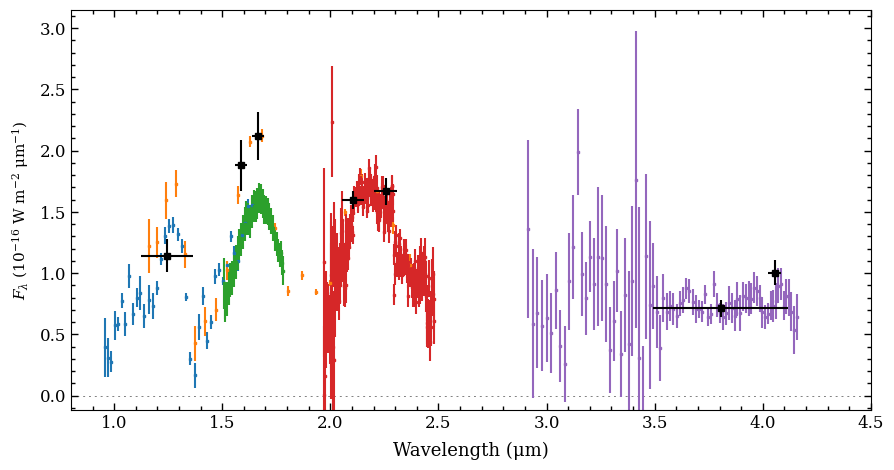

 [DONE]


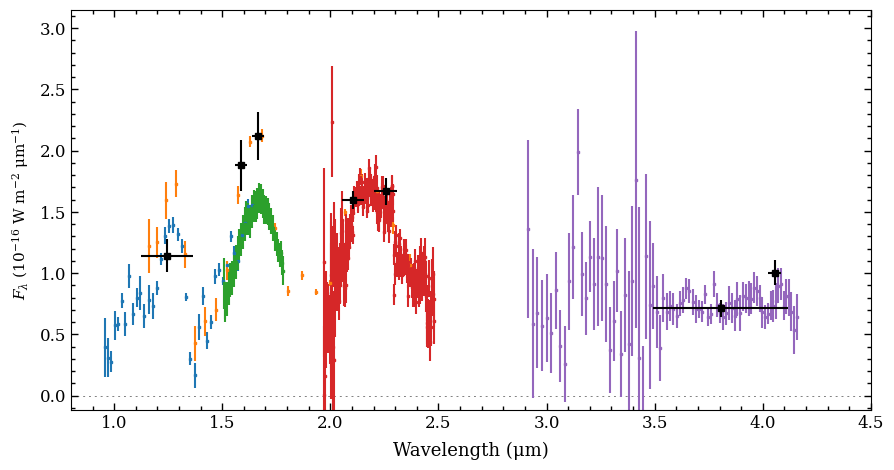

In [184]:
objectbox = database.get_object(object_name=planet_name,
                                inc_phot=filter_list,
                                inc_spec=True)
from species.read import read_filter
for filter in objectbox.filters:
        print(filter)
        print(read_filter.ReadFilter(filter).filter_fwhm())
species.plot_spectrum(boxes=[objectbox],
                      filters=None,
                      residuals=None,
                      xlim=(0.8, 4.5),
                      ylim=(-1.15e-17, 3.15e-16),
                      ylim_res=(-7., 7.),
                      scale=('linear', 'linear'),
                      offset=(-0.08, -0.05),
                      legend=[{'loc': 'upper left', 'frameon': False, 'fontsize': 11.},
                              {'loc': 'upper right', 'frameon': False, 'fontsize': 12.}],
                      figsize=(8., 4.),
                      quantity='flux density',
                      output=None)

In [204]:
fit = species.FitModel(object_name=planet_name,
                       model=current_model,
                       bounds={#'teff': (1000., 1600.),
                               'radius': (0.5, 2.)},
                               #'ALES': ((0.1, 5.),None)},
                               #'GPIH': ((0.1, 5.),None)},
                       inc_phot=filter_list,
                       inc_spec=True,
                       fit_corr=["SPHERE","GPIH","CHARIS","ALES"],
                       weights=None)
"""fit = species.FitModel(object_name=planet_name,
                       model=current_model,
                       bounds={#'teff': (1000., 1600.),
                               'radius': (0.5, 2.),
                               'OSIRIS': ((0.1, 5.),None)},
                               #'GPIH': ((0.1, 5.),None)},
                       inc_phot=filter_list,
                       inc_spec=True,
                       fit_corr=["OSIRIS"],
                       weights=None)"""

Getting object: HR 8799 c... [DONE]
Interpolating JWST/MIRI.F1065C... [DONE]
Interpolating JWST/MIRI.F1140C... [DONE]
Interpolating JWST/MIRI.F1550C... [DONE]
Interpolating Keck/NIRC2.Ms... [DONE]
Interpolating Paranal/NACO.Lp... [DONE]
Interpolating Paranal/NACO.NB405... [DONE]
Interpolating Paranal/SPHERE.IRDIS_B_J... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_H23_2... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_H23_3... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_K12_1... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_K12_2... [DONE]
Interpolating ALES... [DONE]
Interpolating CHARIS... [DONE]
Interpolating GPIH... [DONE]
Interpolating GRAVITY... [DONE]
Interpolating SPHERE... [DONE]
Fitting 15 parameters:
   - teff
   - logg
   - feh
   - c_o_ratio
   - ad_index
   - radius
   - parallax
   - corr_len_ALES
   - corr_amp_ALES
   - corr_len_CHARIS
   - corr_amp_CHARIS
   - corr_len_GPIH
   - corr_amp_GPIH
   - corr_len_SPHERE
   - corr_amp_SPHERE
Prior boundaries:
   - radius = (0.5, 2.

'fit = species.FitModel(object_name=planet_name,\n                       model=current_model,\n                       bounds={#\'teff\': (1000., 1600.),\n                               \'radius\': (0.5, 2.),\n                               \'OSIRIS\': ((0.1, 5.),None)},\n                               #\'GPIH\': ((0.1, 5.),None)},\n                       inc_phot=filter_list,\n                       inc_spec=True,\n                       fit_corr=["OSIRIS"],\n                       weights=None)'

In [205]:
fit.run_multinest(tag=f'{planet_name}_{current_model}',
                  n_live_points=400,
                  output=f'multinest/{planet_name}_{current_model}{tag}',
                  prior={'mass': (7.7, 0.7)})
#b (5.8, 0.4)
#c (7.7, 0.7)
#d (9.2, 0.2)
#e (7.6, 0.9)

Running nested sampling with MultiNest...
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =   15
 *****************************************************


/Users/nasedkin/anaconda3/envs/species/lib/python3.10/site-packages/pymultinest/run.py:208: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  nargs = len(inspect.getargspec(LogLikelihood).args) - inspect.ismethod(LogLikelihood)


 ln(ev)=   15574.812313257537      +/-  0.26059018601754597     
 Total Likelihood Evaluations:       231400
 Sampling finished. Exiting MultiNest
  analysing data from multinest/HR 8799 c_petrus2023_fitcorr_newales.txt
Nested sampling global log-evidence: 15574.81 +/- 0.26
Nested importance sampling global log-evidence: 15570.44 +/- 0.02
Sample with the highest likelihood:
   - Log-likelihood = 15607.49
   - teff = 1232.30
   - logg = 4.34
   - feh = 0.60
   - c_o_ratio = 0.44
   - ad_index = 1.04
   - radius = 0.86
   - parallax = 24.43
   - corr_len_ALES = -0.98
   - corr_amp_ALES = 0.42
   - corr_len_CHARIS = -0.07
   - corr_amp_CHARIS = 0.40
   - corr_len_GPIH = -1.14
   - corr_amp_GPIH = 0.82
   - corr_len_SPHERE = -1.42
   - corr_amp_SPHERE = 0.57
Integrated autocorrelation time:
   - teff: 1.26
   - logg: 1.24
   - feh: 27.37
   - c_o_ratio: 1.37
   - ad_index: 1.20
   - radius: 1.27
   - parallax: 1.59
   - corr_len_ALES: 1.24
   - corr_amp_ALES: 1.40
   - corr_len_CHARIS: 3.3

Getting MCMC spectra:   0%|          | 0/60 [00:00<?, ?it/s]

Median sample:
   - teff = 1.24e+03
   - logg = 4.38e+00
   - feh = 5.88e-01
   - c_o_ratio = 4.42e-01
   - ad_index = 1.04e+00
   - radius = 8.41e-01
   - parallax = 2.45e+01
   - corr_len_ALES = -1.16e+00
   - corr_amp_ALES = 4.63e-01
   - corr_len_CHARIS = -1.11e-01
   - corr_amp_CHARIS = 3.71e-01
   - corr_len_GPIH = -1.20e+00
   - corr_amp_GPIH = 7.83e-01
   - corr_len_SPHERE = -1.52e+00
   - corr_amp_SPHERE = 6.02e-01
Plotting the posterior: plots/HR 8799 c_petrus2023_fitcorr_newales_corner... [DONE]


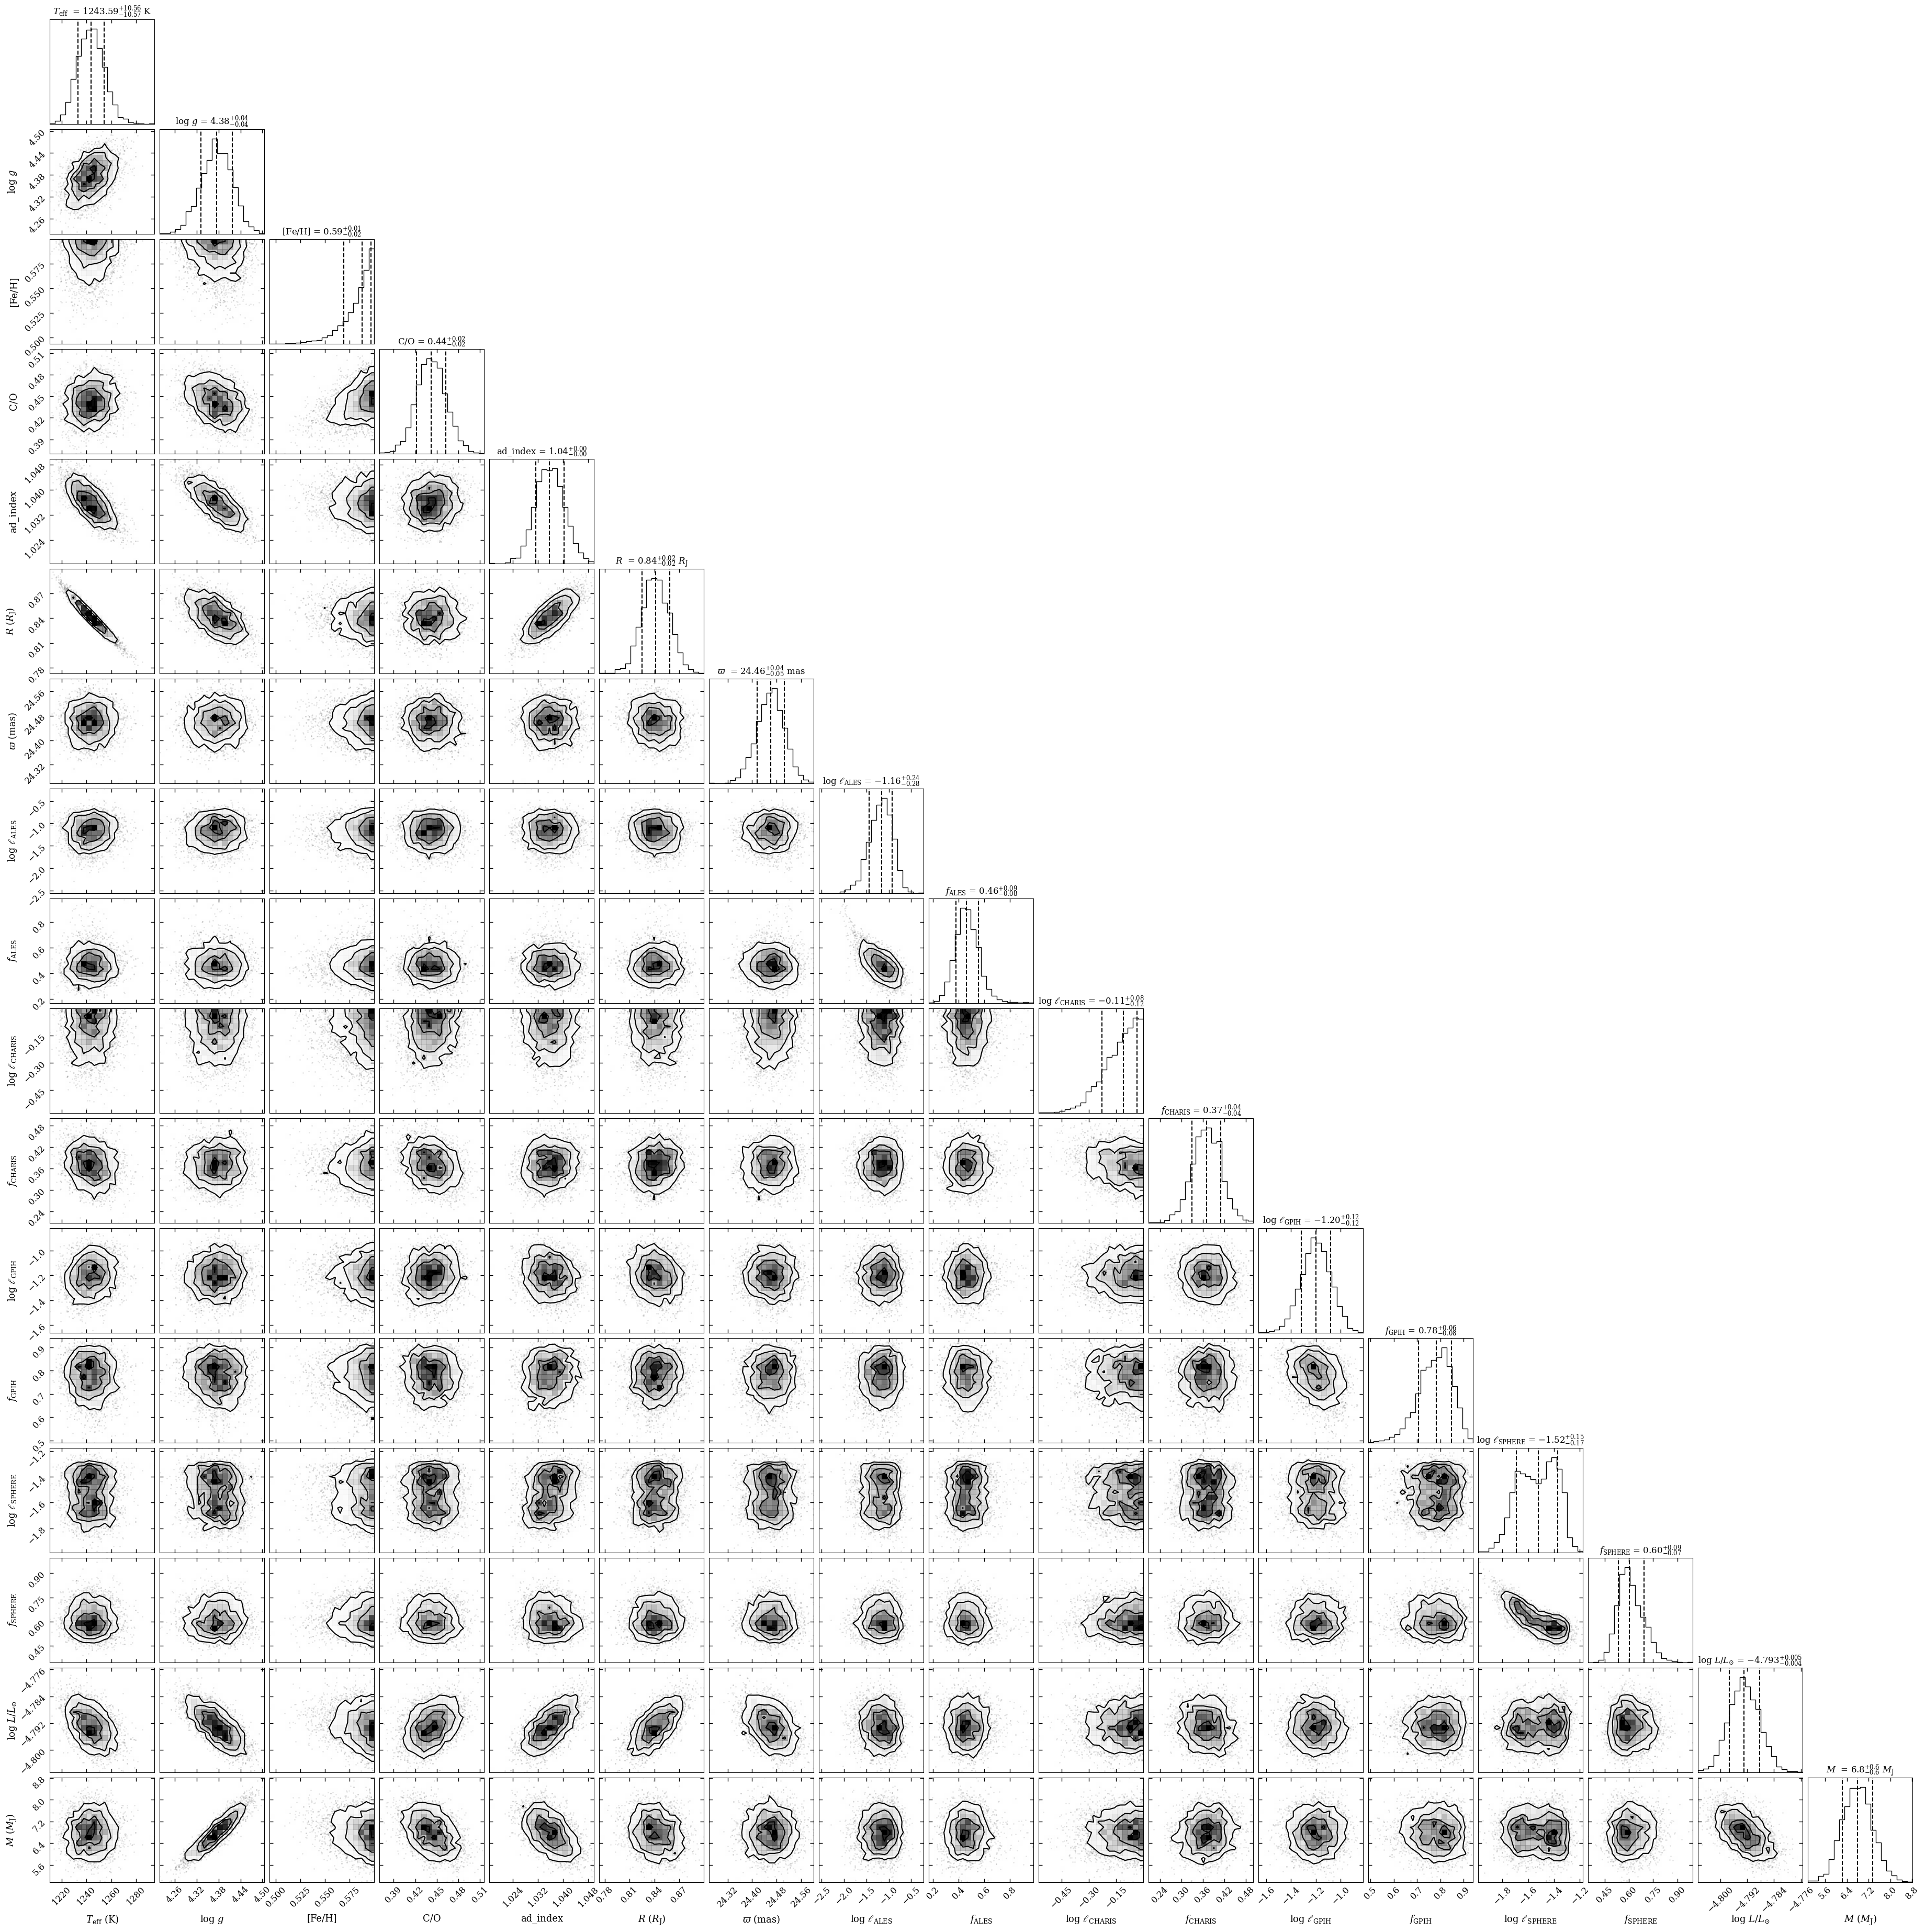

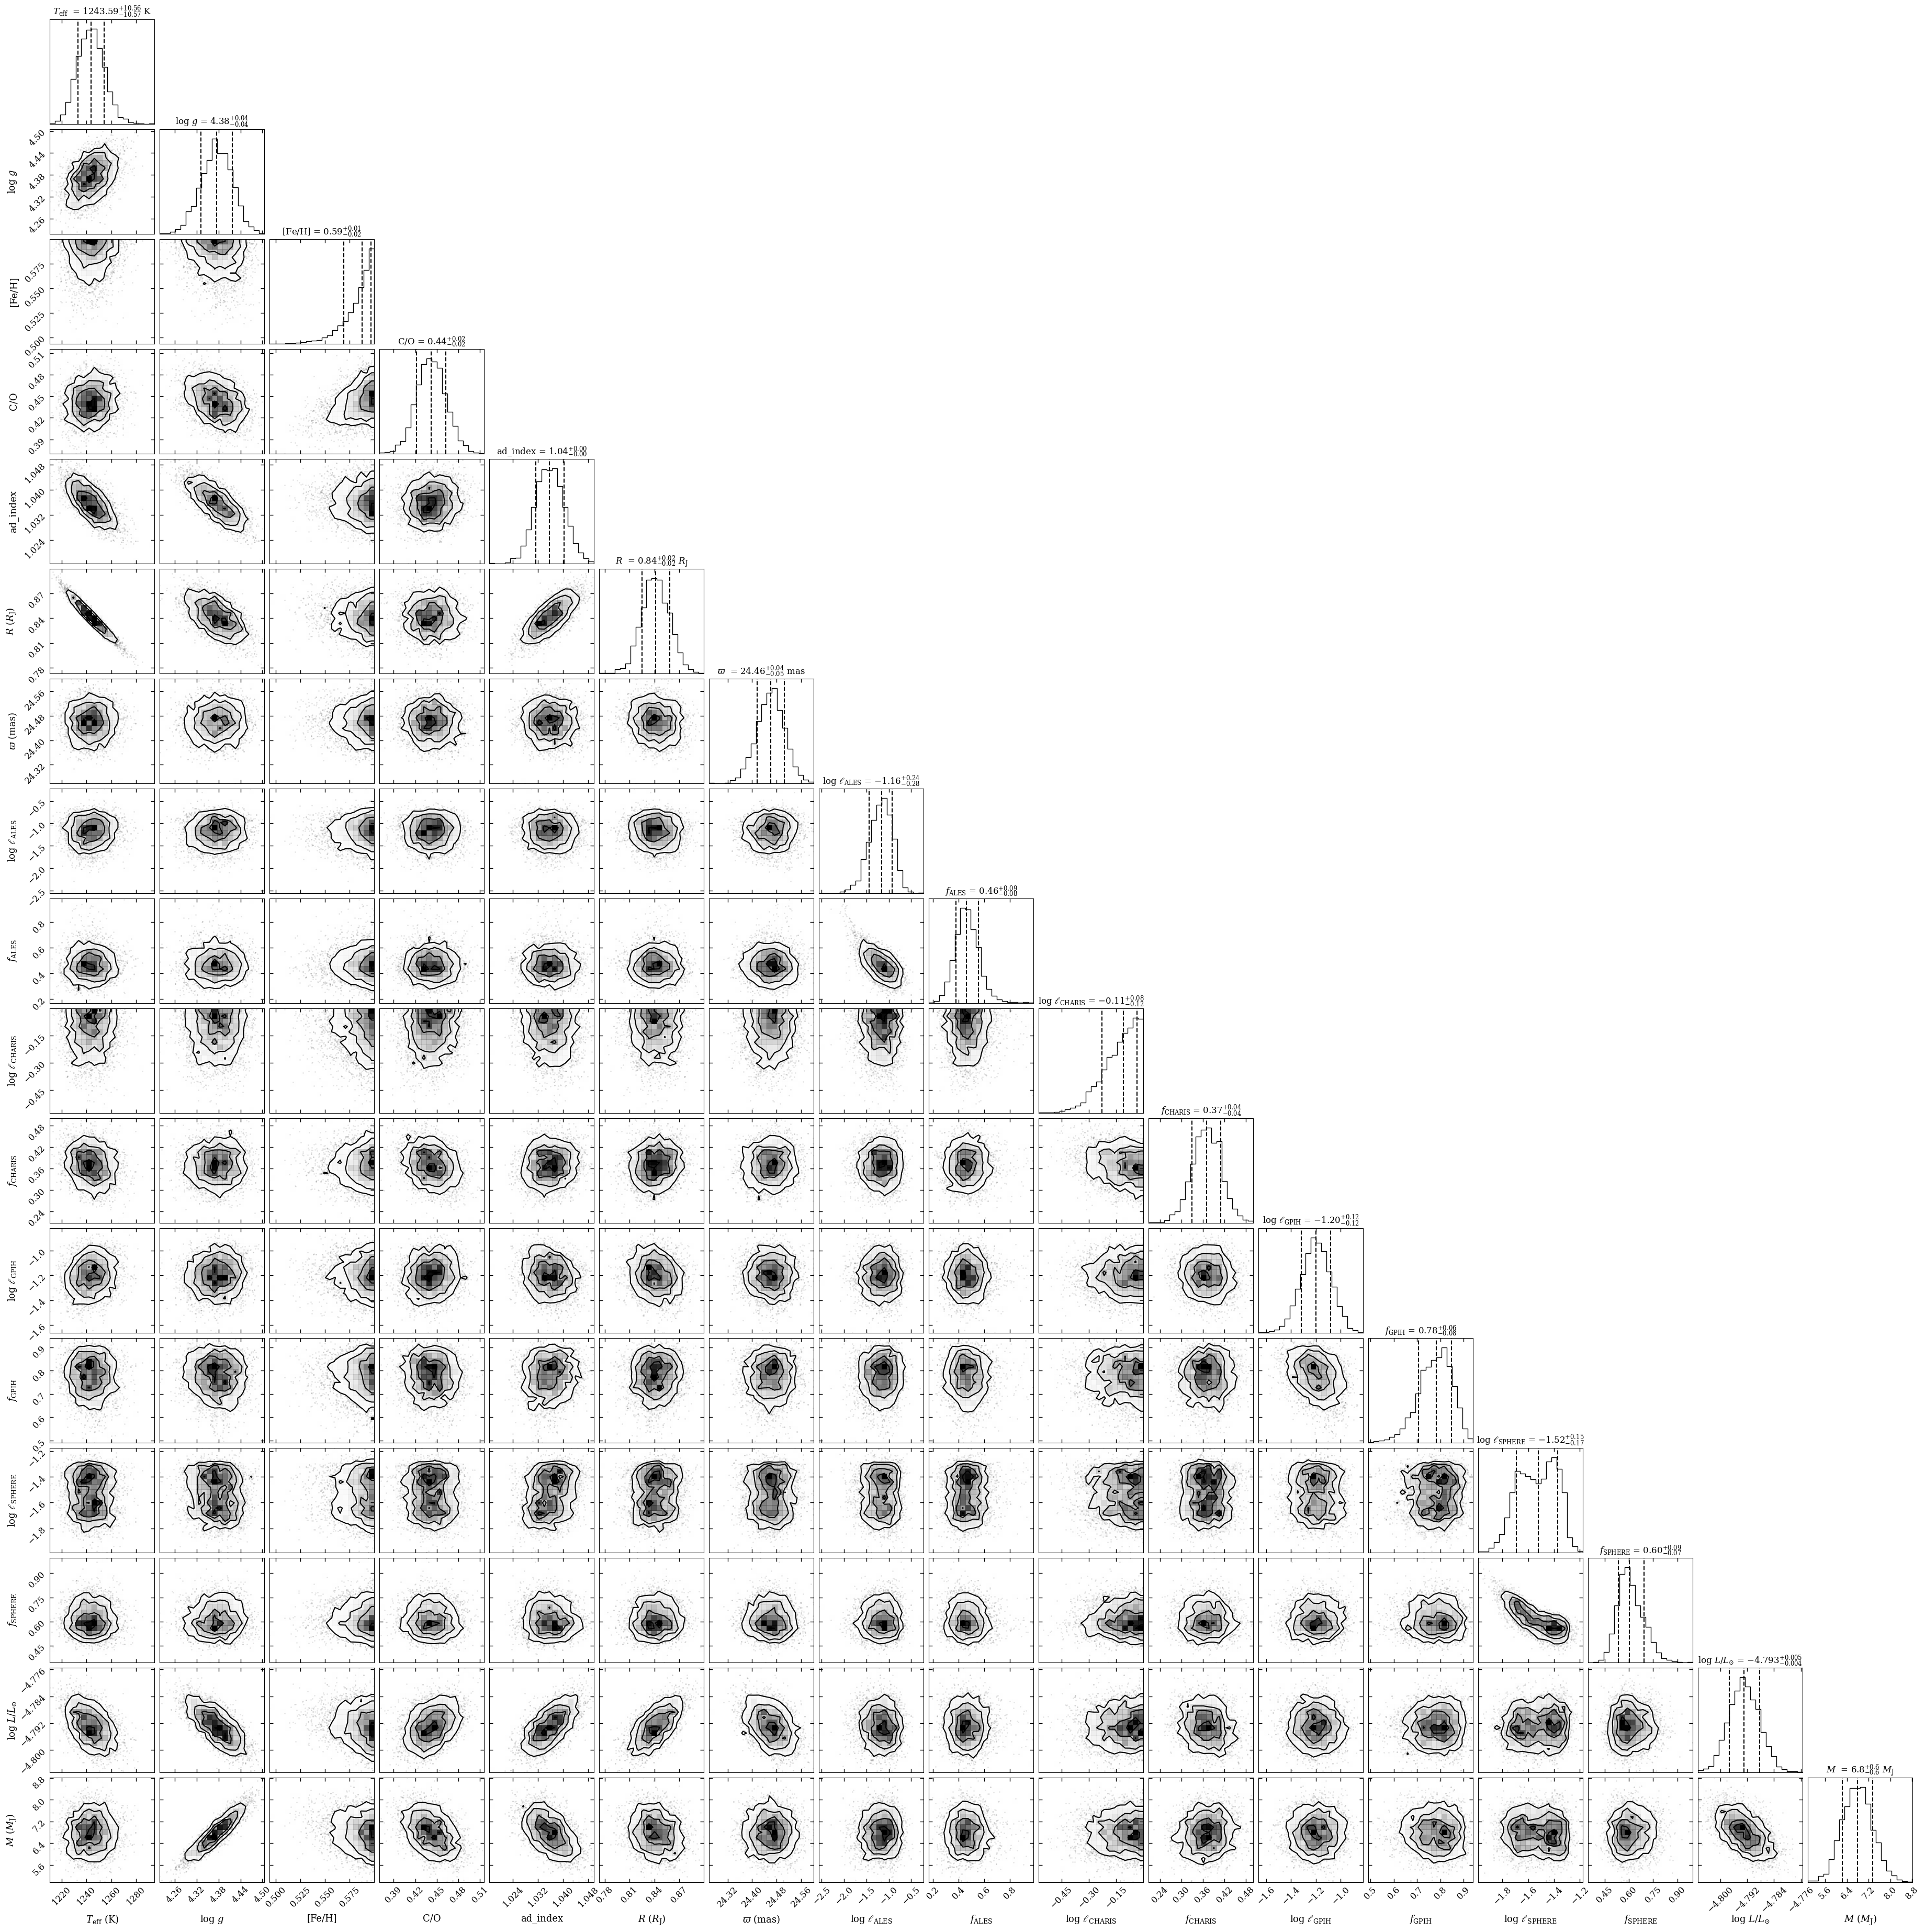

In [206]:
samples = database.get_mcmc_spectra(tag=f'{planet_name}_{current_model}',
                                    random=60,
                                    wavel_range=None,
                                    spec_res=500.)
species.plot_posterior(tag=f'{planet_name}_{current_model}',
                       offset=(-0.3 , -0.3),
                       title_fmt=[ '.2f','.2f','.2f','.2f','.2f','.2f','.2f','.2f','.2f','.2f','.2f','.2f','.2f','.2f','.2f', '.3f', '.1f'],
                       inc_luminosity=True,
                       inc_mass=True,
                       output=f"plots/{planet_name}_{current_model}{tag}_corner")


In [212]:
res = 3500
best = database.get_median_sample(tag=f'{planet_name}_{current_model}')
read_model = species.ReadModel(model=current_model,
                               wavel_range=(0.5,18))
modelbox = read_model.get_model(model_param=best,
                                spec_res=res,
                                smooth=True)



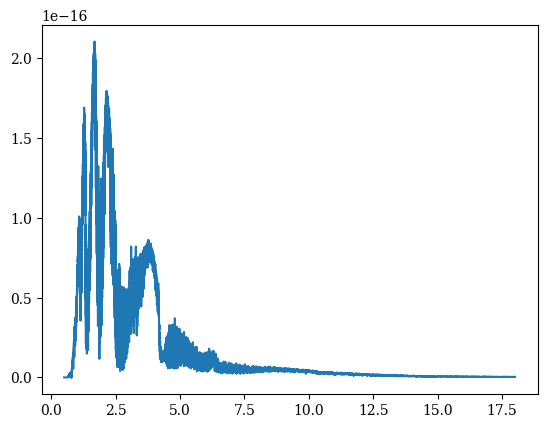

In [213]:
plt.plot(modelbox.wavelength,modelbox.flux)

In [214]:
objectbox = database.get_object(object_name=planet_name,
                                inc_phot=filter_list,
                                inc_spec=True)
objectbox = species.update_spectra(objectbox=objectbox,
                                   model_param=best)
residuals = species.get_residuals(datatype='model',
                                  spectrum=current_model,
                                  parameters=best,
                                  objectbox=objectbox,
                                  inc_phot=filter_list,
                                  inc_spec=True)
synphot = species.multi_photometry(datatype='model',
                                   spectrum=current_model,
                                   filters=filter_list,
                                   parameters=best)
synphot.open_box()


Getting object: HR 8799 c... [DONE]
Calculating synthetic photometry...

/Users/nasedkin/python-packages/species/species/util/read_util.py:176: DeprecationWarning: The update_spectra function is deprecated and will be removed in a future release. Please use the update_objectbox function instead.
  warnings.warn(


 [DONE]
Calculating residuals... [DONE]
Residuals (sigma):
   - JWST/MIRI.F1065C: 0.55
   - JWST/MIRI.F1140C: 2.82
   - JWST/MIRI.F1550C: 4.01
   - Keck/NIRC2.Ms: 1.77
   - Paranal/NACO.Lp: -0.10
   - Paranal/NACO.NB405: 3.86
   - Paranal/SPHERE.IRDIS_B_J: 0.81
   - Paranal/SPHERE.IRDIS_D_H23_2: 1.35
   - Paranal/SPHERE.IRDIS_D_H23_3: 0.97
   - Paranal/SPHERE.IRDIS_D_K12_1: 1.09
   - Paranal/SPHERE.IRDIS_D_K12_2: 1.88
   - ALES: min: -1.77, max: 4.20
   - CHARIS: min: -1.53, max: 7.56
   - GPIH: min: -3.15, max: 1.78
   - GRAVITY: min: -4.23, max: 3.16
   - SPHERE: min: -5.45, max: 5.75
Reduced chi2 = 3.16
Number of degrees of freedom = 408
Calculating synthetic photometry... [DONE]
Opening SynphotBox...
name = synphot
wavelength = {'JWST/MIRI.F1065C': <bound method ReadFilter.mean_wavelength of <species.read.read_filter.ReadFilter object at 0x24952eb00>>, 'JWST/MIRI.F1140C': <bound method ReadFilter.mean_wavelength of <species.read.read_filter.ReadFilter object at 0x24958c640>>, 'JWST

Plotting spectrum: plots/HR 8799 c_petrus2023_fitcorr_newales_bestfit... [DONE]


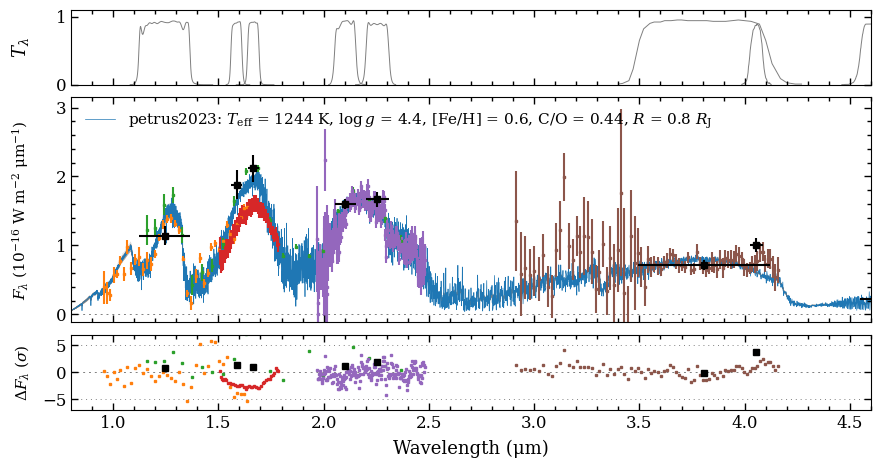

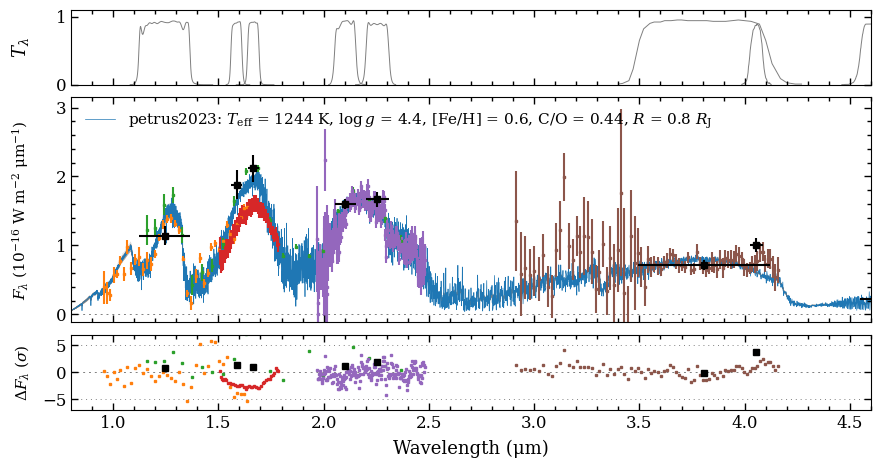

In [215]:
species.plot_spectrum(boxes=[samples, modelbox, objectbox,],
                      filters=objectbox.filters,
                      residuals=residuals,
                      xlim=(0.8, 4.6),
                      ylim=(-1.15e-17, 3.15e-16),
                      ylim_res=(-7., 7.),
                      scale=('linear', 'linear'),
                      offset=(-0.4, -0.05),
                      legend=[{'loc': 'upper left', 'frameon': False, 'fontsize': 11.},
                              {'loc': 'upper right', 'frameon': False, 'fontsize': 12.}],
                      figsize=(8., 4.),
                      quantity='flux density',
                      output=f"plots/{planet_name}_{current_model}{tag}_bestfit")

Plotting spectrum: plots/HR 8799 c_petrus2023_fitcorr_newales_bestfit_fullwaves... [DONE]


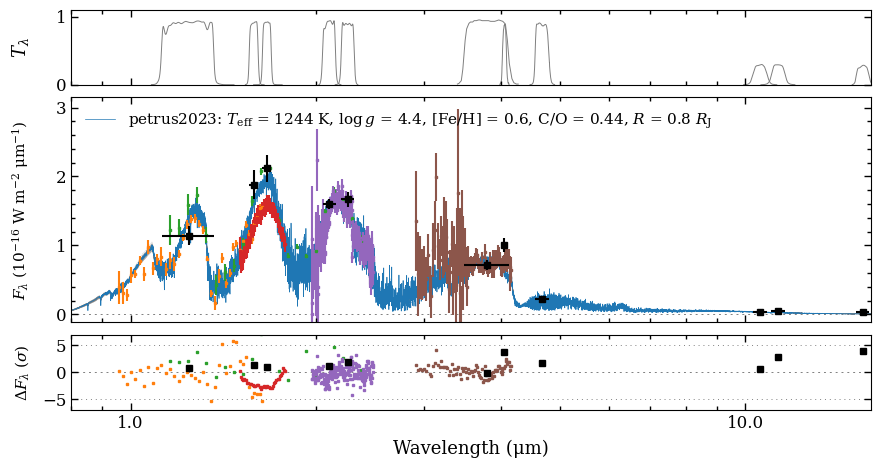

In [216]:
species.plot_spectrum(boxes=[samples, modelbox, objectbox,],
                      filters=objectbox.filters,
                      residuals=residuals,
                      xlim=(0.8, 16),
                      ylim=(-1.15e-17, 3.15e-16),
                      ylim_res=(-7., 7.),
                      scale=('log', 'linear'),
                      offset=(-0.4, -0.05),
                      legend=[{'loc': 'upper left', 'frameon': False, 'fontsize': 11.},
                              {'loc': 'upper right', 'frameon': False, 'fontsize': 12.}],
                      figsize=(8., 4.),
                      quantity='flux density',
                      output=f"plots/{planet_name}_{current_model}{tag}_bestfit_fullwaves")
np.savetxt(f"grid_fit_spectra/{planet_name}_{current_model}{tag}_R{res}BestFit.dat",np.column_stack([modelbox.wavelength,modelbox.flux]))